In [1]:
# Import the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('50_Startups.csv')

In [5]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [6]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
# Encoading the categorical variable 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x = ct.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.2,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,1:] = sc.fit_transform(x_train[:,1:])
x_test[:,1:] = sc.transform(x_test[:,1:])

In [13]:
print(x_train)

[[0.0 1.3627702877384937 -0.693888666488711 0.3420214917054793
  0.2278767782056234 0.12425037675982561]
 [0.0 1.3627702877384937 -0.693888666488711 1.3620784917345992
  -1.097473695438894 1.1499068756530315]
 [1.0 -0.7337993857053428 -0.693888666488711 -0.7108129728948954
  -2.5770185976138653 -0.3413682525763912]
 [0.0 -0.7337993857053428 1.4411533842457842 0.9061143813653676
  1.0172367029234282 0.6689018532376049]
 [0.0 -0.7337993857053428 1.4411533842457842 1.409970875138404
  -0.09115402570882848 1.300068606323669]
 [1.0 -0.7337993857053428 -0.693888666488711 1.2036710299893565
  0.9611633188437886 -0.9524878432853034]
 [0.0 1.3627702877384937 -0.693888666488711 -1.0528582620448337
  -1.3439253815580903 -0.6284338875289133]
 [0.0 1.3627702877384937 -0.693888666488711 -1.614809064545102
  -0.19649413840893654 0.541067677988688]
 [1.0 -0.7337993857053428 -0.693888666488711 -1.6426230017180679
  0.5269144150253678 -2.0785493496354306]
 [0.0 -0.7337993857053428 1.4411533842457842 0.7

In [14]:
print(x_test)

[[1.0 -0.7337993857053428 -0.693888666488711 0.30245366792672457
  0.5294283623998659 0.14916233060879563]
 [1.0 -0.7337993857053428 -0.693888666488711 -0.8273462357022546
  -1.407693694798703 -0.5356047682700492]
 [0.0 1.3627702877384937 -0.693888666488711 -0.3318187417704711
  -0.20294703370198142 -1.2750578330916038]
 [0.0 -0.7337993857053428 1.4411533842457842 -1.6214742519434526
  0.11103853789537373 -2.06176266262126]
 [0.0 -0.7337993857053428 1.4411533842457842 0.3587972628367966
  0.8829122340888429 0.412869190024794]
 [0.0 -0.7337993857053428 1.4411533842457842 -1.6311619579428058
  -2.560049545057109 -2.0785493496354306]
 [0.0 1.3627702877384937 -0.693888666488711 -0.04987791065449718
  0.8481780763804415 -0.8966484555281393]
 [1.0 -0.7337993857053428 -0.693888666488711 -0.27535970123912273
  0.6791249831038696 -0.8621520442749451]
 [1.0 -0.7337993857053428 -0.693888666488711 -0.30191325132705293
  0.2979364153599656 -1.6722220856499808]
 [0.0 -0.7337993857053428 1.4411533842

In [17]:
from sklearn.linear_model import LinearRegression
regressor =  LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred =  regressor.predict(x_test)

In [19]:
print(y_pred)

[126362.87908252  84608.45383643  99677.49425155  46357.46068582
 128750.48288497  50912.41741905 109741.350327   100643.24281644
  97599.275746   113097.42524437]


In [20]:
print(y_test)

[134307.35  81005.76  99937.59  64926.08 125370.37  35673.41 105733.54
 107404.34  97427.84 122776.86]


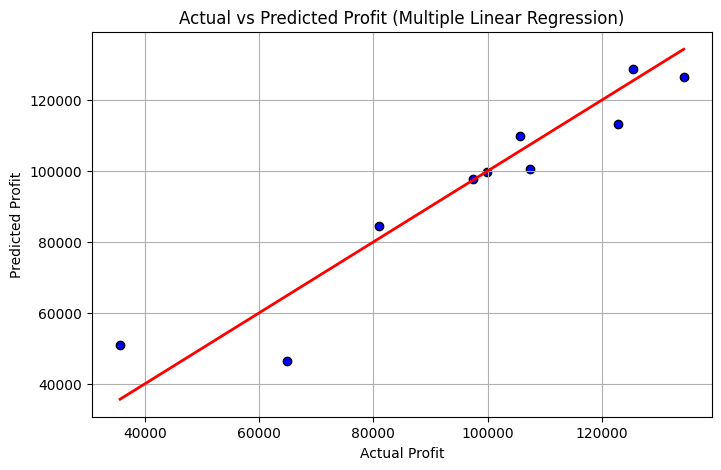

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit (Multiple Linear Regression)')
plt.grid(True)
plt.show()